<a href="https://colab.research.google.com/github/chemicalchild/ShapeAI-project-High-value-of-stock/blob/main/RNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import numpy as np
import pandas as pd #alias


In [296]:
path ="/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"
df = pd.read_csv(path)

In [297]:
df.head() #show first few rows of data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [298]:
df.tail() #show last set of rows of data

,Date,Open,High,Low,Close,Volume,Stock Trading
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [299]:
df = df['High'] #select data in open column only 
df.head()

0    42330
1    43220
2    43970
3    43700
4    43660
Name: High, dtype: int64

In [300]:
import matplotlib.pyplot as plt #import library for math plot 

def plot_series(data):

  for do in data:
    plt.plot(df)
  plt.show() 

In [301]:
train = df[ :int(0.8*len(df))] #split data set 80%
test = df[int(0.8*len(df)): ] #split data set 20%

In [302]:
#reshape data to be fed int RNN
def arrange(data, window=10):

  x=[]
  y=[]

  for i, val in enumerate(data): #loop through data 
    if i<window:  #if i is not up to specified number in window 

      continue 

    x.append(data[i-window: i-1].values.reshape(-1, 1))
    y.append(data[i:i+1].values.reshape(-1, 1))

    x= np.asarray(x)
    y=np.asarray(y)

    return x,y  

In [303]:
x_train, y_train = arrange(train, 15)

print ("x-shape is: {} and  y-shape is: {}".format(x_train.shape, y_train.shape))

x-shape is: (1, 14, 1) and  y-shape is: (1, 1, 1)


In [304]:
print(x_train[0])
print(y_train[0])


[[42330]
 [43220]
 [43970]
 [43700]
 [43660]
 [43840]
 [44370]
 [43630]
 [43150]
 [43550]
 [43880]
 [43440]
 [43300]
 [44000]]
[[41560]]


In [305]:
#building model 

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import SimpleRNN, Dense, Input

In [306]:
x_train.shape[1:]

(14, 1)

In [307]:
Netp = Sequential()
Netp.add(SimpleRNN(3, activation='relu', input_shape=x_train.shape[1:] ))
Netp.add(Dense(1, activation="relu"))


Netp.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 3)                 15        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [308]:
Netp.compile(loss ='mean_squared_error', optimizer ='adam',  metrics=['mse'])

In [309]:
Netp.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 802ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 1727233536.0000 - mse: 1727233536.0000
Epoch 10/10
1/1

In [310]:
x_test, y_test, = arrange(test, 15)
print ("x-test is: {} and  y-test is: {}".format(x_test.shape, y_test.shape))

x-test is: (1, 14, 1) and  y-test is: (1, 1, 1)


In [311]:
print(x_test[0])
print(y_test[0])

[[21170]
 [20770]
 [20710]
 [20880]
 [21330]
 [20840]
 [20910]
 [20120]
 [20260]
 [19860]
 [19700]
 [19460]
 [19360]
 [19420]]
[[18990]]


In [312]:
x_test, y_test, = arrange(test, 15) 
pred = Netp.predict(x_test) 
pred

array([[0.]], dtype=float32)

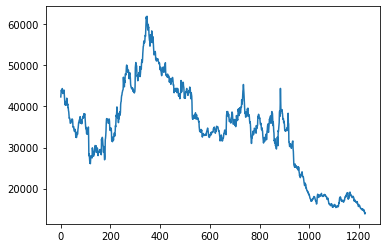

In [313]:
plot_series([pred[:,0]])

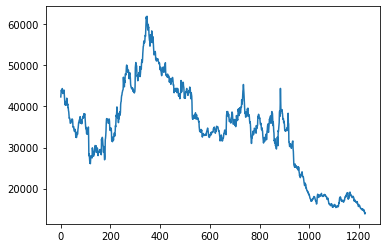

In [314]:
plot_series(y_test[:,:,0])

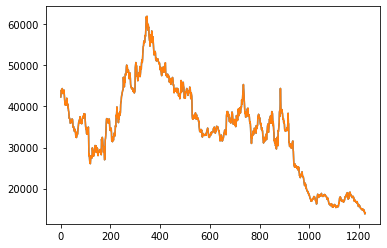

In [315]:
plot_series([pred[:,0],y_test[:,:,0]])